# Решающие деревья.

In [8]:
# Импортируем библиотеки
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [9]:
# Создадим пример данных
from sklearn.datasets import make_circles
X_circles, y_circles = make_circles(n_samples=500, factor=0.1, noise=0.35, random_state=42)

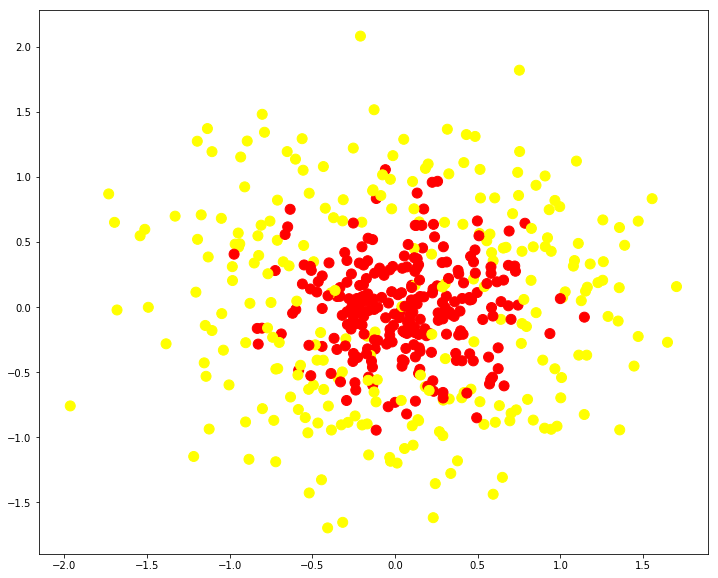

In [37]:
#рисуем данные
from matplotlib.colors import ListedColormap
color_map = ListedColormap(['yellow', 'red'])
plt.figure(figsize=(12,10))
plt.scatter(X_circles[:,0], X_circles[:,1], c=y_circles, cmap=color_map, s=100)

In [11]:
# Создадим решающее дерево
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=42)

In [12]:
from sklearn.cross_validation import train_test_split
X_train_circles, X_test_circles, y_train_circles, y_test_circles = train_test_split(X_circles,
                                                                                    y_circles,
                                                                                    test_size=0.2)

In [13]:
dtree.fit(X_train_circles, y_train_circles)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [14]:
predict = dtree.predict(X_test_circles)

In [15]:
# Измерим качество алгоритма
dtree.score(X_test_circles, y_test_circles)

0.74

In [24]:
# Самостоятельная работа
from sklearn.model_selection import cross_val_score
# Todo: проверить как работает алгоритм на кросс валидации
# ваш код здесь
cross_val_score(DecisionTreeClassifier(), X_circles, y_circles, cv=10)

array([0.78, 0.72, 0.76, 0.68, 0.72, 0.72, 0.8 , 0.76, 0.82, 0.72])

In [25]:
from sklearn import metrics
def get_meshgrid(data, step=.05, border=.5,):
    x_min, x_max = data[:, 0].min() - border, data[:, 0].max() + border
    y_min, y_max = data[:, 1].min() - border, data[:, 1].max() + border
    return np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

def plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels):
    #fit model
    estimator.fit(train_data, train_labels)
    
    #set figure size
    pyplot.figure(figsize = (16, 6))
    
    light_colors = ListedColormap(['lightyellow','lightcoral'])
    colors = ListedColormap(['yellow', 'red'])
    
    #plot decision surface on the train data 
    pyplot.subplot(1,2,1)
    xx, yy = get_meshgrid(train_data)
    mesh_predictions = np.array(estimator.predict(np.c_[xx.ravel(), yy.ravel()])).reshape(xx.shape)
    pyplot.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
    pyplot.scatter(train_data[:, 0], train_data[:, 1], c = train_labels, s = 40, cmap = colors)
    pyplot.title('Train data, accuracy={}'.format(metrics.accuracy_score(train_labels, estimator.predict(train_data))))
    
    #plot decision surface on the test data
    pyplot.subplot(1,2,2)
    pyplot.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
    pyplot.scatter(test_data[:, 0], test_data[:, 1], c = test_labels, s = 40, cmap = colors)
    pyplot.title('Test data, accuracy={}'.format(metrics.accuracy_score(test_labels, estimator.predict(test_data))))

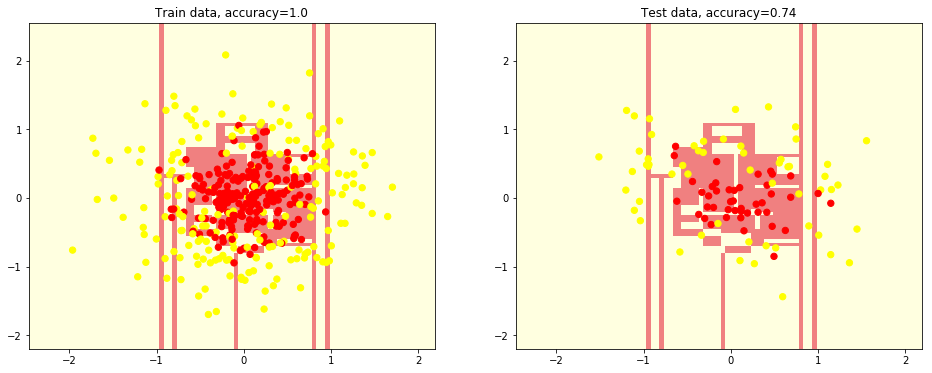

In [26]:
plot_decision_surface(dtree, X_train_circles,y_train_circles, X_test_circles, y_test_circles)

In [27]:
#Давайте обсудим с какими параметраим решающего дерева можно "играться" чтобы улучшить качество алгоритма

In [28]:
# Поиграемся с параметрами решающего дерева

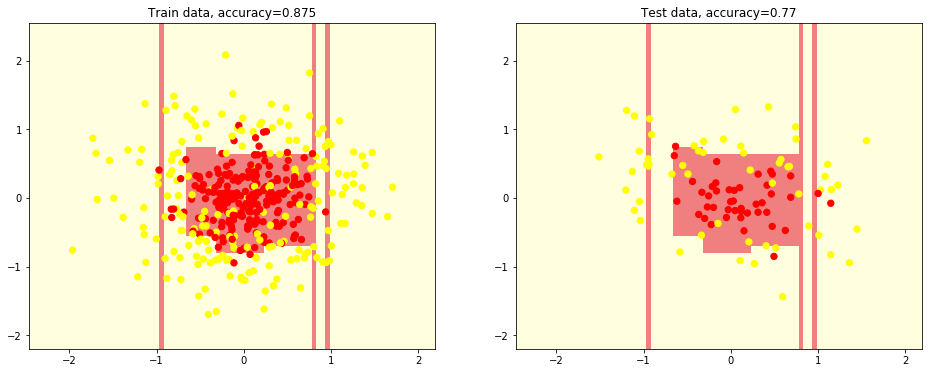

In [29]:
plot_decision_surface(DecisionTreeClassifier(max_depth=5), X_train_circles,y_train_circles, X_test_circles, y_test_circles)

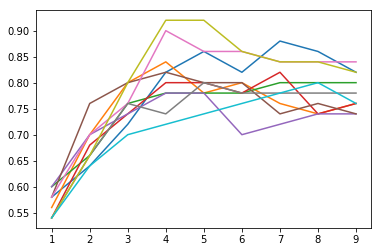

In [41]:
# Самостоятельная работа
# Todo: изучить качество работы алгоритма при изменении max_depth
# ваш код здесь
import matplotlib.pyplot as plt
max_depth_var = range(1, 10)
y_grapth = []
x_grapth = []
for i in max_depth_var:
    y_grapth.append(cross_val_score(DecisionTreeClassifier(max_depth=i), X_circles, y_circles, cv=10))
    x_grapth.append(i)
plt.plot(x_grapth, y_grapth)

In [42]:
# Самостоятельная работа
# Todo: изучить качество работы алгоритма при изменении min_samples_leaf
# ваш код здесь


In [43]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
def draw_accuracy_graph(alg, param, grid_list, X, y):
    # Инициализируем валидацию
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    
    train_acc = []
    test_acc = []
    temp_train_acc = []
    temp_test_acc = []
    trees_grid = grid_list
    
    # Обучаем на тренировочном датасете
    for ntrees in trees_grid:
        _kwargs = {param:ntrees}
        rfc = alg(**_kwargs)
        temp_train_acc = []
        temp_test_acc = []
        for train_index, test_index in skf.split(X, y):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]
            rfc.fit(X_train, y_train)
            temp_train_acc.append(rfc.score(X_train, y_train))
            temp_test_acc.append(rfc.score(X_test, y_test))
        train_acc.append(temp_train_acc)
        test_acc.append(temp_test_acc)

    train_acc, test_acc = np.asarray(train_acc), np.asarray(test_acc)
    print("Best accuracy on CV is {:.2f}% with {} {}".format(max(test_acc.mean(axis=1))*100, 
                                                            trees_grid[np.argmax(test_acc.mean(axis=1))],
                                                            param))
    
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(trees_grid, train_acc.mean(axis=1), alpha=0.5, color='blue', label='train')
    ax.plot(trees_grid, test_acc.mean(axis=1), alpha=0.5, color='red', label='cv')
    ax.fill_between(trees_grid, test_acc.mean(axis=1) - test_acc.std(axis=1), test_acc.mean(axis=1) + test_acc.std(axis=1), color='#888888', alpha=0.4)
    ax.fill_between(trees_grid, test_acc.mean(axis=1) - 2*test_acc.std(axis=1), test_acc.mean(axis=1) + 2*test_acc.std(axis=1), color='#888888', alpha=0.2)
    ax.legend(loc='best')
    #ax.set_ylim([0.88,1.02])
    ax.set_ylabel("Accuracy")
    ax.set_xlabel(param)

Best accuracy on CV is 82.80% with 4 max_depth


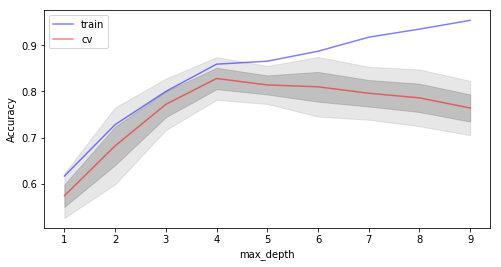

In [44]:
draw_accuracy_graph(DecisionTreeClassifier,'max_depth', list(range(1,10)), X_circles, y_circles)

Best accuracy on CV is 83.20% with 19 min_samples_leaf


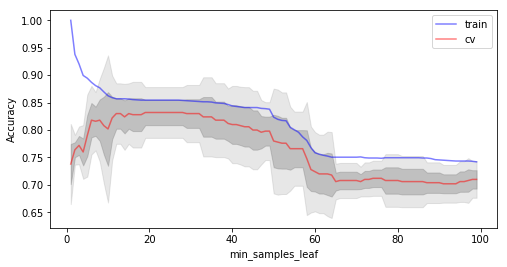

In [45]:
draw_accuracy_graph(DecisionTreeClassifier,'min_samples_leaf', list(range(1,100)), X_circles, y_circles)

In [46]:
# Код для изучения точности в зависимости от параметров
# Ваш код здесь

## Чо там у титаника

In [53]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [54]:
# Загрузка данных
df = pd.read_csv("all/titanic.csv")

In [64]:
def pereprocess_data(data):
    new_df = pd.DataFrame()
    new_df['Age'] = df.Age.fillna(data.Age.mean())
    new_df['Sex'] = pd.Series([1 if s == 'male' else 0 for s in data.Sex], name = 'Sex')
    new_df['Pclass'] = data.Pclass
X_titanic = pereprocess_data(df)
y_titanic = np.array(df.Survived)
dtc = DecisionTreeClassifier(random_state=43)
reg = LogisticRegression(random_state=42)
print(cross_val_score(reg, X_titanic, y_titanic, cv=5))
print(cross_val_score(dtc, X_titanic, y_titanic, cv=5))

TypeError: Expected sequence or array-like, got <class 'NoneType'>